# The Ising Model of a Ferromagnet

## Implement the ising program for a 2D ferromagnet

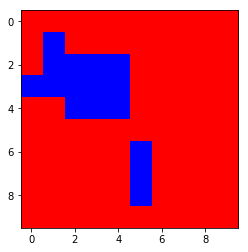

In [53]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

SIZE = 10                               #Width of square lattice
T = 2.5                                 #Temperature in usits of epsilon/k

S = np.zeros((SIZE, SIZE))

def initialize():
    """initialize to a random array"""
    for i in range(0, SIZE):
        for j in range(0, SIZE):
            if random.random() < 0.5:
                S[i, j] = 1
            else:
                S[i, j] = -1

def delta_u(i, j):
    """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
    if i == 1:
        top = S[SIZE-1, j]
    else:
        top = S[i-1, j]
    if i == SIZE-1:
        bottom = S[1, j]
    else:
        bottom = S[i+1, j]
    if j == 1:
        left = S[i, SIZE-1]
    else:
        left = S[i, j-1]
    if j == SIZE-1:
        right = S[i, 1]
    else:
        right = S[i, j+1]
    return 2*S[i, j]*(top+bottom+left+right)

initialize()

for iteration in range(1, 100*SIZE**2 + 1):       #Main iteration loop
    row = int(random.random()*SIZE)             #Choose a random row number
    column = int(random.random()*SIZE)
    Ediff = delta_u(row, column)                    #Compute delta_u of hypothetical flip
    if Ediff <= 0:                       #If flipping it reduces the energy ...
        S[row, column] = -S[row, column]                 #then flip it!
    else:
        if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
            S[row, column] = -S[row, column]                 #gives the probability of flipping

CMAP = colors.ListedColormap(['red', 'blue'])
BOUNDS = [-2, 0, 2]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

FIG, ax = plt.subplots()
ax.imshow(S, cmap=CMAP, norm=NORM)

# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
# ax.set_xticks(np.arange(-0.5, SIZE, 1))
# ax.set_yticks(np.arange(-0.5, SIZE, 1))

plt.show()


80


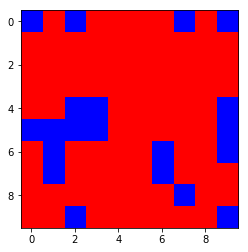

In [54]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors

SIZE = 10                               #Width of square lattice
T = 2.5                                 #Temperature in usits of epsilon/k

S = np.zeros((SIZE, SIZE))

def initialize():
    """initialize to a random array"""
    for i in range(0, SIZE):
        for j in range(0, SIZE):
            if random.random() < 0.5:
                S[i, j] = 1
            else:
                S[i, j] = -1

def delta_u(i, j):
    """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
    if i == 1:
        top = S[SIZE-1, j]
    else:
        top = S[i-1, j]
    if i == SIZE-1:
        bottom = S[1, j]
    else:
        bottom = S[i+1, j]
    if j == 1:
        left = S[i, SIZE-1]
    else:
        left = S[i, j-1]
    if j == SIZE-1:
        right = S[i, 1]
    else:
        right = S[i, j+1]
    return 2*S[i, j]*(top+bottom+left+right)

initialize()

for iteration in range(1, 100*SIZE**2 + 1):       #Main iteration loop
    row = int(random.random()*SIZE)             #Choose a random row number
    column = int(random.random()*SIZE)
    Ediff = delta_u(row, column)                    #Compute delta_u of hypothetical flip
    if Ediff <= 0:                       #If flipping it reduces the energy ...
        S[row, column] = -S[row, column]                 #then flip it!
    else:
        if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
            S[row, column] = -S[row, column]                 #gives the probability of flipping


visited = np.zeros((SIZE, SIZE)) #declare array to keep track of which lattice sites have been visited by DFS

def dfs(S, i, j, count, visited,state):
    """A standard Depth First Search algorithm used to count to the size of a cluster containg lattice site (i, j)"""
    visited[i,j] = 1
    if i < SIZE-1:
        if S[i+1, j] == state and visited[i+1, j] == 0:
            count += 1
            count, visited = dfs(S, i+1, j, count, visited, state)             
    if i > 0:
        if S[i-1, j] == state and visited[i-1, j] == 0:
            count += 1
            count, visited = dfs(S, i-1, j, count, visited, state)
    if j < SIZE-1:
        if S[i, j+1] == state and visited[i, j+1] == 0:
            count += 1
            count, visited = dfs(S, i, j+1, count, visited, state)
    if j > 0:
        if S[i, j-1] == state and visited[i, j-1] == 0:
            count += 1
            count, visited = dfs(S, i , j-1, count, visited, state)
    return count, visited

region = []

for i in range(0, SIZE-1): #fill region with the sizes of all the clusters
    for j in range(0, SIZE-1):
        count = 1
        state = S[i, j]
        region.append(dfs(S, i, j, count, visited, state)[0])

print(max(region)) #print the size of the largest cluster


    
            
CMAP = colors.ListedColormap(['red', 'blue'])
BOUNDS = [-2, 0, 2]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

FIG, ax = plt.subplots()
ax.imshow(S, cmap=CMAP, norm=NORM)

# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
# ax.set_xticks(np.arange(-0.5, SIZE, 1))
# ax.set_yticks(np.arange(-0.5, SIZE, 1))

plt.show()


### Part a:

Run the program with a 20 x 20 lattice at $T = 10,5,4,3, \mathrm{and} 2.5$, for at least 100 iterations per dipole per run. At each temperature make a rough estimate of the size of the largest clusters.

The largest cluster size is 73
The largest cluster accounts for 18.25 percent of the total lattice sites
T =  10


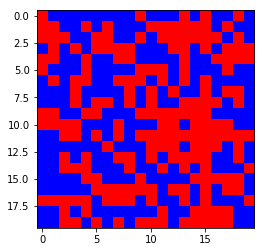


 
 

The largest cluster size is 69
The largest cluster accounts for 17.25 percent of the total lattice sites
T =  5


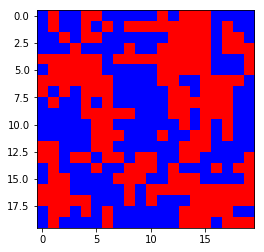


 
 

The largest cluster size is 62
The largest cluster accounts for 15.5 percent of the total lattice sites
T =  4


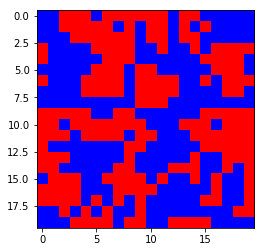


 
 

The largest cluster size is 136
The largest cluster accounts for 34.0 percent of the total lattice sites
T =  3


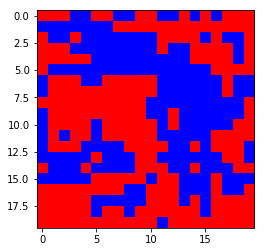


 
 

The largest cluster size is 260
The largest cluster accounts for 65.0 percent of the total lattice sites
T =  2.5


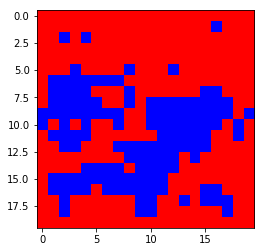

In [59]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

SIZE = 20                              #Width of square lattice
for T in [10, 5, 4, 3, 2.5]:          #Temperature in units of epsilon/
    S = np.zeros((SIZE, SIZE))

    def initialize():
        """initialize to a random array"""
        for i in range(0, SIZE):
            for j in range(0, SIZE):
                if random.random() < 0.5:
                    S[i, j] = 1
                else:
                    S[i, j] = -1

    def delta_u(i, j):
        """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
        if i == 1:
            top = S[SIZE-1, j]
        else:
            top = S[i-1, j]
        if i == SIZE-1:
            bottom = S[1, j]
        else:
            bottom = S[i+1, j]
        if j == 1:
            left = S[i, SIZE-1]
        else:
            left = S[i, j-1]
        if j == SIZE-1:
            right = S[i, 1]
        else:
            right = S[i, j+1]
        return 2*S[i, j]*(top+bottom+left+right)

    initialize()

    for iteration in range(1, 100*SIZE**2 + 1):       #Main iteration loop
        row = int(random.random()*SIZE)             #Choose a random row number
        column = int(random.random()*SIZE)
        Ediff = delta_u(row, column)                    #Compute delta_u of hypothetical flip
        if Ediff <= 0:                       #If flipping it reduces the energy ...
            S[row, column] = -S[row, column]                 #then flip it!
        else:
            if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
                S[row, column] = -S[row, column]                 #gives the probability of flipping
                
    visited = np.zeros((SIZE, SIZE))

    def dfs(S, i, j, count, visited,state):
        visited[i,j] = 1
        if i < SIZE-1:
            if S[i+1, j] == state and visited[i+1, j] == 0:
                count += 1
                count, visited = dfs(S, i+1, j, count, visited, state)             
        if i > 0:
            if S[i-1, j] == state and visited[i-1, j] == 0:
                count += 1
                count, visited = dfs(S, i-1, j, count, visited, state)
        if j < SIZE-1:
            if S[i, j+1] == state and visited[i, j+1] == 0:
                count += 1
                count, visited = dfs(S, i, j+1, count, visited, state)
        if j > 0:
            if S[i, j-1] == state and visited[i, j-1] == 0:
                count += 1
                count, visited = dfs(S, i , j-1, count, visited, state)
        return count, visited

    region = []

    for i in range(0, SIZE-1):
        for j in range(0, SIZE-1):
            count = 1
            state = S[i, j]
            region.append(dfs(S, i, j, count, visited, state)[0])

    CMAP = colors.ListedColormap(['red', 'blue'])
    BOUNDS = [-2, 0, 2]
    NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

    FIG, ax = plt.subplots()
    ax.imshow(S, cmap=CMAP, norm=NORM)

###############uncomment these linds to show grid on figure####################
#     ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#     ax.set_xticks(np.arange(-0.5, SIZE, 1))
#     ax.set_yticks(np.arange(-0.5, SIZE, 1))
    
    print('The largest cluster size is', max(region))
    print('The largest cluster accounts for', (max(region)/(SIZE**2))*100, 'percent of the total lattice sites')
    print('T = ', T)    
    plt.show()
    print('\n \n \n')


## Part b:

Repeat part (a) for a 40x40 latice. Are the cluster sizes any different? Explain.

The largest cluster size is 188
The largest cluster accounts for 11.75 percent of the total lattice sites
T =  10


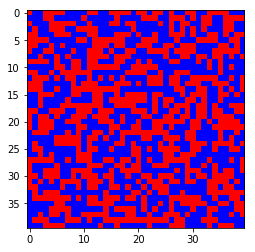


 
 

The largest cluster size is 460
The largest cluster accounts for 28.749999999999996 percent of the total lattice sites
T =  5


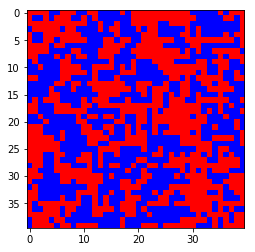


 
 

The largest cluster size is 270
The largest cluster accounts for 16.875 percent of the total lattice sites
T =  4


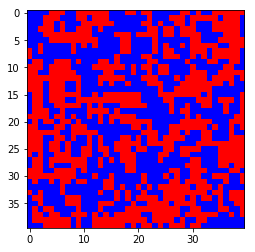


 
 

The largest cluster size is 649
The largest cluster accounts for 40.5625 percent of the total lattice sites
T =  3


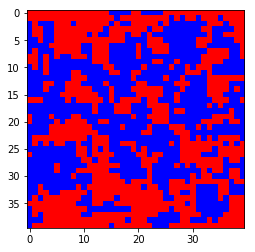


 
 

The largest cluster size is 811
The largest cluster accounts for 50.6875 percent of the total lattice sites
T =  2.5


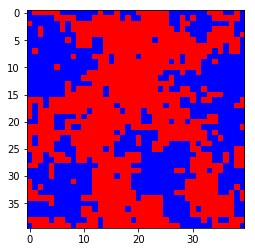

In [60]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

SIZE = 40                              #Width of square lattice
for T in [10, 5, 4, 3, 2.5]:          #Temperature in units of epsilon/
    S = np.zeros((SIZE, SIZE))

    def initialize():
        """initialize to a random array"""
        for i in range(0, SIZE):
            for j in range(0, SIZE):
                if random.random() < 0.5:
                    S[i, j] = 1
                else:
                    S[i, j] = -1

    def delta_u(i, j):
        """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
        if i == 1:
            top = S[SIZE-1, j]
        else:
            top = S[i-1, j]
        if i == SIZE-1:
            bottom = S[1, j]
        else:
            bottom = S[i+1, j]
        if j == 1:
            left = S[i, SIZE-1]
        else:
            left = S[i, j-1]
        if j == SIZE-1:
            right = S[i, 1]
        else:
            right = S[i, j+1]
        return 2*S[i, j]*(top+bottom+left+right)

    initialize()

    for iteration in range(1, 100*SIZE**2 + 1):       #Main iteration loop
        row = int(random.random()*SIZE)             #Choose a random row number
        column = int(random.random()*SIZE)
        Ediff = delta_u(row, column)                    #Compute delta_u of hypothetical flip
        if Ediff <= 0:                       #If flipping it reduces the energy ...
            S[row, column] = -S[row, column]                 #then flip it!
        else:
            if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
                S[row, column] = -S[row, column]                 #gives the probability of flipping
                
    visited = np.zeros((SIZE, SIZE))

    def dfs(S, i, j, count, visited,state):
        visited[i,j] = 1
        if i < SIZE-1:
            if S[i+1, j] == state and visited[i+1, j] == 0:
                count += 1
                count, visited = dfs(S, i+1, j, count, visited, state)             
        if i > 0:
            if S[i-1, j] == state and visited[i-1, j] == 0:
                count += 1
                count, visited = dfs(S, i-1, j, count, visited, state)
        if j < SIZE-1:
            if S[i, j+1] == state and visited[i, j+1] == 0:
                count += 1
                count, visited = dfs(S, i, j+1, count, visited, state)
        if j > 0:
            if S[i, j-1] == state and visited[i, j-1] == 0:
                count += 1
                count, visited = dfs(S, i , j-1, count, visited, state)
        return count, visited

    region = []

    for i in range(0, SIZE-1):
        for j in range(0, SIZE-1):
            count = 1
            state = S[i, j]
            region.append(dfs(S, i, j, count, visited, state)[0])

    CMAP = colors.ListedColormap(['red', 'blue'])
    BOUNDS = [-2, 0, 2]
    NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

    FIG, ax = plt.subplots()
    ax.imshow(S, cmap=CMAP, norm=NORM)

    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    #ax.set_xticks(np.arange(0, SIZE, 1))
    #ax.set_yticks(np.arange(0, SIZE, 1))

    print('The largest cluster size is', max(region))
    print('The largest cluster accounts for', (max(region)/(SIZE**2))*100, 'percent of the total lattice sites')
    print('T = ', T)    
    plt.show()
    print('\n \n \n')


The total cluster size of the 20X20 lattice are (predictably) smaller than the largest clusters in the 40x40 lattice (more lattice sites means that clusters that are proportionally similar to clusters in a lattice with less sites have comparatively more lattice sites in the cluster itself). That being said, the percentage of the lattice that the largest cluster takes up is smaller for the 40X40 lattice than it is for the 20X20 lattice. This is because the 40X40 lattice is large enough as to make it's biggest region less significant, and allows for more "small" clusters to form in various places across the 2D lattice.

## Part c:

Run the program with a 20X20 lattice at $T = 2, \; 1.5, \; \mathrm{and} \; 1$. Estimate the average magnetization (as a percentage of total saturation) at each of these temperatures. Disregard runs in which the system gets stuck in a metastable state with two domains.

T =  2
The lattice is -31.5 percent magnetized


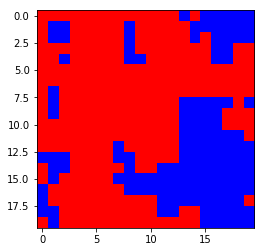


 
 

T =  1.5
The lattice is 99.5 percent magnetized


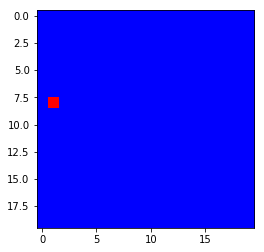


 
 

T =  1
The lattice is -100.0 percent magnetized


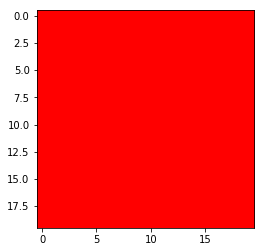

In [76]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

SIZE = 20                              #Width of square lattice
for T in [2, 1.5, 1]:          #Temperature in units of epsilon
    S = np.zeros((SIZE, SIZE))

    def initialize():
        """initialize to a random array"""
        for i in range(0, SIZE):
            for j in range(0, SIZE):
                if random.random() < 0.5:
                    S[i, j] = 1
                else:
                    S[i, j] = -1

    def delta_u(i, j):
        """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
        if i == 1:
            top = S[SIZE-1, j]
        else:
            top = S[i-1, j]
        if i == SIZE-1:
            bottom = S[1, j]
        else:
            bottom = S[i+1, j]
        if j == 1:
            left = S[i, SIZE-1]
        else:
            left = S[i, j-1]
        if j == SIZE-1:
            right = S[i, 1]
        else:
            right = S[i, j+1]
        return 2*S[i, j]*(top+bottom+left+right)

    initialize()

    for iteration in range(1, 100*SIZE**2 + 1):       #Main iteration loop
        row = int(random.random()*SIZE)             #Choose a random row number
        column = int(random.random()*SIZE)
        Ediff = delta_u(row, column)                    #Compute delta_u of hypothetical flip
        if Ediff <= 0:                       #If flipping it reduces the energy ...
            S[row, column] = -S[row, column]                 #then flip it!
        else:
            if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
                S[row, column] = -S[row, column]                 #gives the probability of flipping

    CMAP = colors.ListedColormap(['red', 'blue'])
    BOUNDS = [-2, 0, 2]
    NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

    FIG, ax = plt.subplots()
    ax.imshow(S, cmap=CMAP, norm=NORM)

#     ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
#     ax.set_xticks(np.arange(-0.5, SIZE, 1))
#     ax.set_yticks(np.arange(-0.5, SIZE, 1))

    print('T = ', T)
    print('The lattice is',100*sum(sum(S))/(SIZE**2), 'percent magnetized')
    plt.show()
    print('\n \n \n')


# Part d:

Run the program with a 10X10 lattice at T = 2.5. Watch it run for 100,000 iterations or so. Describe and explain the behavior.

<IPython.core.display.Javascript object>


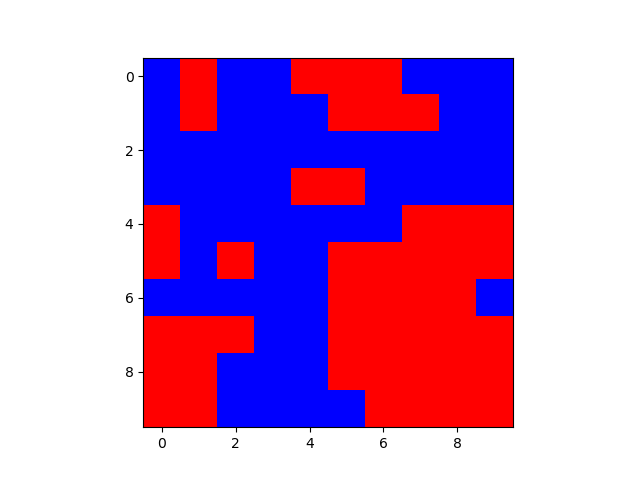

In [100]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors

SIZE = 10                               #Width of square lattice
T = 2.5                                 #Temperature in usits of epsilon/k

S = np.zeros((SIZE, SIZE))

def initialize():
    """initialize to a random array"""
    for i in range(0, SIZE):
        for j in range(0, SIZE):
            if random.random() < 0.5:
                S[i, j] = 1
            else:
                S[i, j] = -1

def delta_u(i, j):
    """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
    if i == 1:
        top = S[SIZE-1, j]
    else:
        top = S[i-1, j]
    if i == SIZE-1:
        bottom = S[1, j]
    else:
        bottom = S[i+1, j]
    if j == 1:
        left = S[i, SIZE-1]
    else:
        left = S[i, j-1]
    if j == SIZE-1:
        right = S[i, 1]
    else:
        right = S[i, j+1]
    return 2*S[i, j]*(top+bottom+left+right)

initialize()

def animate(iteration):
    row = int(random.random()*SIZE)             #Choose a random row number
    column = int(random.random()*SIZE)
    Ediff = delta_u(row, column)                    #Compute delta_u of hypothetical flip
    if Ediff <= 0:                       #If flipping it reduces the energy ...
        S[row, column] = -S[row, column]                 #then flip it!
    else:
        if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
            S[row, column] = -S[row, column]                 #gives the probability of flipping
    ax.imshow(S, cmap=CMAP, norm=NORM)
    return ax

CMAP = colors.ListedColormap(['red', 'blue'])
BOUNDS = [-2, 0, 2]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
fig, ax = plt.subplots()
# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
# ax.set_xticks(np.arange(-0.5, SIZE, 1))
# ax.set_yticks(np.arange(-0.5, SIZE, 1))

def init():
    ax.imshow(S, cmap=CMAP, norm=NORM)
    return ax

#animate for 100000 iterations
anim = animation.FuncAnimation(fig, animate, frames=itertools.count(100000), interval=200, repeat=False, blit=True)

plt.show()

Notice that most of the time what happens is a blue square neer a cluster or red squares or a red square near a cluster of blue squares changes its color to match the nearby cluster. This represents energetically favored spin state transitions. However, once in a while, a lone blue state or red state will appear in the middle of a sea of the opposite color. This represents energetically unfavorable (but statistically possible) spin state transitions, the probability of which is dictated by the Boltzman factor!



## Modify the ising program to simulate a three-dimensional Ising model with a simple cubic lattice. In whatever way you can, try to show that this system has a critical point around T=4.5

In [ ]:
"""Monte Carlo simulation of a 2D Ising model using the Metropolis algorithm"""

import random
import numpy as np
import mayavi as mlab
import matplotlib.pyplot as plt
from matplotlib import colors

SIZE = 10                               #Width of square lattice
magnetization = []
T_array = np.geomspace(5.5, 3.5)
for T in T_array:                             #Temperature in usits of epsilon/k

    S = np.zeros((SIZE, SIZE, SIZE))

    def initialize():
        """initialize to a random array"""
        for i in range(0, SIZE):
            for j in range(0, SIZE):
                for k in range(0, SIZE):
                    if random.random() < 0.5:
                        S[i, j, k] = 1
                    else:
                        S[i, j, k] = -1

    def delta_u(i, j, k):
        """Compute delta_u of flipping a dipole (note periodic boundary conditions)"""
        if i == 1:
            top = S[SIZE-1, j, k]
        else:
            top = S[i-1, j, k]
        if i == SIZE-1:
            bottom = S[1, j, k]
        else:
            bottom = S[i+1, j, k]
        if j == 1:
            left = S[i, SIZE-1, k]
        else:
            left = S[i, j-1, k]
        if j == SIZE-1:
            right = S[i, 1, k]
        else:
            right = S[i, j+1, k]
        if k == 1:
            front = S[i, j, SIZE-1]
        else:
            front = S[i, j, k-1]
        if k == SIZE-1:
            back = S[i, j, 1]
        else:
            back = S[i, j, k+1]
        return 2*S[i, j, k]*(top+bottom+left+right+front+back)

    initialize()
    
    flips = 0

    while flips < 100*SIZE**3:       #Main iteration loop
        row = int(random.random()*SIZE)             #Choose a random row number
        column = int(random.random()*SIZE)
        plane = int(random.random()*SIZE)
        Ediff = delta_u(row, column, plane)                    #Compute delta_u of hypothetical flip
        if Ediff <= 0:                       #If flipping it reduces the energy ...
            S[row, column, plane] = -S[row, column, plane]                 #then flip it!
            flips += 1
        else:
            if random.random() < np.exp(-Ediff/T): #otherwise the Boltzman factor
                S[row, column, plane] = -S[row, column, plane]                 #gives the probability of flipping
                flips += 1

#    print(S)
    print('T = ', T)
    print('The lattice is',100*sum(sum(sum(S)))/(SIZE**3), 'percent magnetized \n \n \n')
    
    magnetization.append(abs(100*sum(sum(sum(S)))/(SIZE**3)))
    
plt.scatter(T_array, magnetization)
plt.ylabel('Percent Magnetization')
plt.xlabel('T')
plt.show()

#CMAP = colors.ListedColormap(['red', 'blue'])
#BOUNDS = [-2, 0, 2]
#NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

#FIG, ax = plt.subplots()
#ax.imshow(S, cmap=CMAP, norm=NORM)

#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#ax.set_xticks(np.arange(-0.5, SIZE, 1))
#ax.set_yticks(np.arange(-0.5, SIZE, 1))

#plt.show()


T =  5.500000000000001
The lattice is -1.0 percent magnetized 
 
 

T =  5.449500243551012
The lattice is 7.8 percent magnetized 
 
 

T =  5.399464164447733
The lattice is -8.6 percent magnetized 
 
 

T =  5.3498875053096135
The lattice is 14.0 percent magnetized 
 
 

T =  5.300766047846408
The lattice is 10.6 percent magnetized 
 
 

T =  5.25209561249926
The lattice is 5.8 percent magnetized 
 
 

T =  5.203872058085075
The lattice is -16.8 percent magnetized 
 
 

T =  5.156091281444167
The lattice is -13.6 percent magnetized 
 
 

T =  5.108749217091132
The lattice is -2.4 percent magnetized 
 
 

T =  5.061841836868937
The lattice is 16.2 percent magnetized 
 
 

T =  5.015365149606176
The lattice is -20.2 percent magnetized 
 
 

T =  4.969315200777475
The lattice is -24.8 percent magnetized 
 
 

T =  4.923688072167017
The lattice is 15.6 percent magnetized 
 
 

T =  4.878479881535156
The lattice is -2.2 percent magnetized 
 
 

T =  4.833686782288099
The lattice is 25.6 per

Notice that that around T=4.5, the magnitude of the percent magnetization decreases significantly. As the temperature keeps increasing beyond this point, the magnitude of the percent magnetization has a general downward trend. This is expected! Above te critical point, thermal energy provides the spin states with enough energy to "maintain some individuality" (that is, the spin states have the potential to be disordered), thus the percent magnetization (the coherency of the electron spins) is low. However, as temperature decreases below the critical point, there is a spontaneous breaking of symmetry where the percent magnetization gets much, much higher and spin states start allighning with each other.